In [106]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy


# My Tools
import milanesas.eda_helper as eh

# from toolkit.tools import (
#   print_column_uniques,
#   make_df,
#  get_column_uniques,
#  explode_pie,
#     percentage_to_normal,
#     get_color,
#     replace_column_content,
#     make_vertical_grouped_chart,
#     make_horizontal_grouped_chart,
#     make_horizontal_bar,
#     make_custom_horizontal_bar,
#     get_normal_uniques_col_count,
#     get_percentage,
#     make_normalized_df,
#     get_uniques_col_count,
# )


%matplotlib inline

In [107]:
plt.rcParams["figure.figsize"] = [12, 7]

In [108]:
sns.set()
sns.set_palette("pastel")

In [109]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [110]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [111]:
# COLORS
# ============================
# Light
color_hombres_light = "#8ecae6"
color_mujeres_light = "#ffafcc"
color_neutro_light = "#d4a373"
# Dark
color_hombres_dark = "#023047"
color_mujeres_dark = "#ff006e"
color_neutro_dark = "#ffb703"

# HELPER FUNCTIONS 

In [112]:
def show_colors():
    print(
        """
    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)
"""
    )

In [113]:
show_colors()


    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)



# SUELDOS
- Sueldos percibidos por los devs que contestaron las preguntas.

Análisis por Salarios de los Encuestados

Introducción:

El análisis por salarios de los encuestados nos permite comprender la distribución de los ingresos en el sector IT en Paraguay.

Preguntas a explorar:

    ¿Cuál es el salario promedio de los encuestados?
    ¿Existe una diferencia significativa en los salarios por género, experiencia laboral, nivel educativo, modalidad de trabajo o tipo de empresa?
    ¿Qué factores influyen en el nivel de los salarios?
    ¿Cómo se comparan los salarios del sector IT con los de otros sectores?
    ¿Existe una brecha salarial entre las diferentes modalidades de trabajo?
    ¿Cómo se puede mejorar la transparencia salarial en el sector IT?

Recursos adicionales:

    [se quitó una URL no válida]: un estudio sobre los salarios en el sector IT en América Latina.
    [se quitó una URL no válida]: una encuesta sobre los salarios en el sector IT en Paraguay.
    [se quitó una URL no válida]: una guía para negociar tu salario.

Al responder a estas preguntas, se podrá obtener una imagen más completa de la situación salarial en el sector IT en Paraguay. Esta información será valiosa para:

    Los trabajadores del sector IT: para comprender su valor en el mercado laboral y negociar mejores salarios.
    Las empresas del sector IT: para determinar los niveles salariales competitivos y atraer y retener talento.
    Los formuladores de políticas: para diseñar políticas públicas que promuevan la equidad salarial y la justicia social.

Tenga en cuenta que las preguntas específicas que formule dependerán de los datos que haya recopilado en su encuesta.

A continuación, se presentan algunos ejemplos de preguntas que puede formular para analizar las diferencias salariales:

    ¿En qué rango de salario se encuentra su salario actual?
    ¿Ha experimentado discriminación salarial en su trabajo?
    ¿Qué factores cree que son importantes para determinar el nivel de un salario?
    ¿Qué información le gustaría tener a la hora de negociar su salario?

Las respuestas a estas preguntas pueden ayudar a identificar las desigualdades salariales que existen en el sector IT.

Además de las preguntas sobre los salarios, también puede formular preguntas sobre las opiniones y actitudes de los encuestados sobre la remuneración.

    ¿Qué opina sobre la transparencia salarial en el sector IT?
    ¿Cree que existe una brecha salarial de género en el sector IT?
    ¿Qué medidas cree que se necesitan para reducir las desigualdades salariales en el sector IT?

Las respuestas a estas preguntas pueden ayudar a comprender las causas de las desigualdades salariales y las posibles soluciones.

Al analizar los datos de la encuesta por salarios, se puede obtener una mejor comprensión de la distribución de los ingresos en el sector IT en Paraguay. Esta información puede ser utilizada para promover la equidad salarial, la justicia social y el desarrollo del sector IT.

Aquí hay algunas preguntas adicionales que puede formular para explorar la experiencia de los encuestados con los salarios:

    ¿Ha recibido un aumento de salario en el último año?
    ¿Cree que su salario es justo en comparación con el de sus colegas?
    ¿Ha tenido dificultades para negociar un salario adecuado?
    ¿Qué consejos le daría a alguien que está negociando un salario en el sector IT?

Las respuestas a estas preguntas pueden proporcionar información valiosa sobre cómo los trabajadores pueden negociar mejores salarios y cómo las empresas pueden crear un sistema de remuneración más justo y transparente.

## SEGUN GENERO

In [114]:
genero = df.groupby("genero")

In [115]:
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object', name='genero')

### HOMBRES

In [116]:
genero.get_group("HOMBRE")["salario_mensual"].value_counts()

salario_mensual
5 a 7 M. Gs.           48
7 a 9 M. Gs.           41
9 a 12 M. Gs.          37
3.5 a 5 M. Gs.         37
MINIMO a 3.5 M. Gs.    31
12 a 15 M. Gs.         23
< MINIMO Gs.           13
15 a 18 M. Gs.         13
> 27 M. Gs.            13
21 a 24 M. Gs.          7
MINIMO                  6
18 a 21 M. Gs.          6
24 a 27 M. Gs.          4
Name: count, dtype: int64

In [117]:
show_colors()


    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)



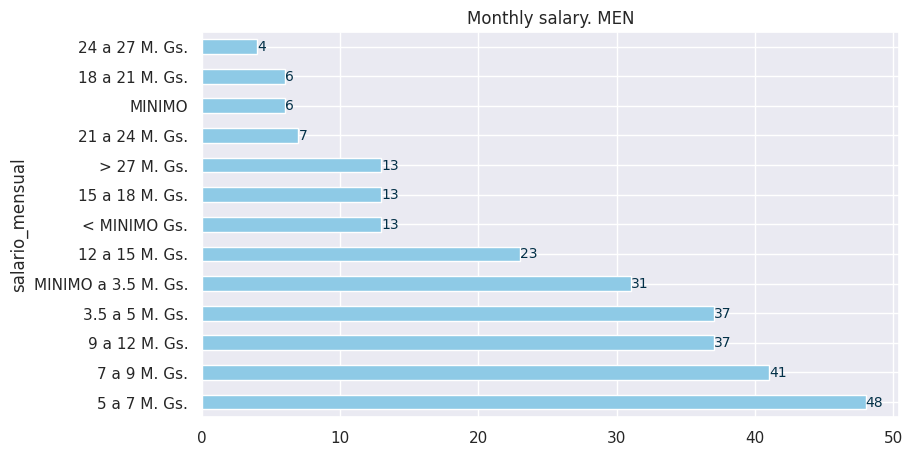

In [118]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

rects = (
    genero.get_group("HOMBRE")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(kind="barh", title="Monthly salary. MEN", color=color_hombres_light)
)


for k, v in enumerate(
    genero.get_group("HOMBRE")["salario_mensual"].value_counts(normalize=False).values
):
    rects.annotate(v, (v, k), va="center", color=color_hombres_dark, size=10)
plt.show()

### MUJERES

In [119]:
genero.get_group("MUJER")["salario_mensual"].value_counts()

salario_mensual
5 a 7 M. Gs.           12
7 a 9 M. Gs.            8
MINIMO a 3.5 M. Gs.     7
3.5 a 5 M. Gs.          7
9 a 12 M. Gs.           7
12 a 15 M. Gs.          3
MINIMO                  2
> 27 M. Gs.             2
18 a 21 M. Gs.          1
Name: count, dtype: int64

In [120]:
genero.get_group("MUJER")["salario_mensual"].value_counts(normalize=False).values

array([12,  8,  7,  7,  7,  3,  2,  2,  1])

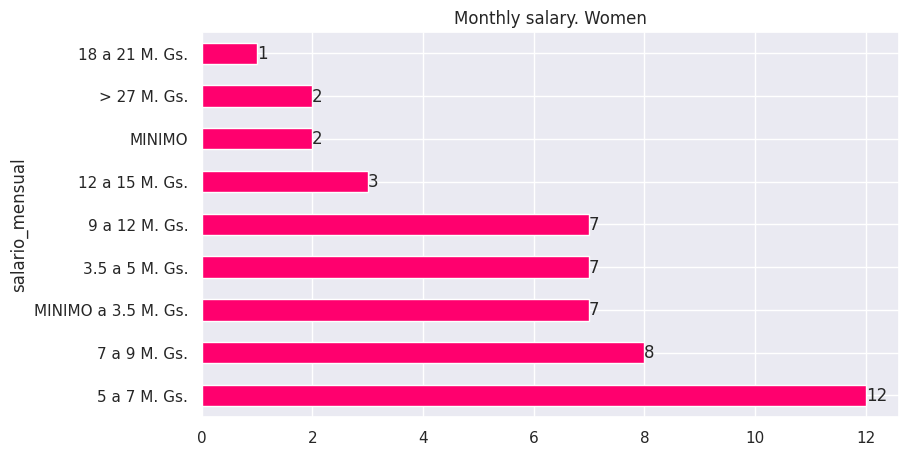

In [121]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

ret = (
    genero.get_group("MUJER")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Monthly salary. Women",
        color=color_mujeres_dark,
    )
)
for k, v in enumerate(
    genero.get_group("MUJER")["salario_mensual"].value_counts(normalize=False).values
):
    ret.annotate(
        v,
        (v, k),
        va="center",
    )
plt.show()

### NO DEFINIDO

In [122]:
genero.get_group("NO COMPARTO")["salario_mensual"].value_counts()

salario_mensual
3.5 a 5 M. Gs.         1
5 a 7 M. Gs.           1
> 27 M. Gs.            1
MINIMO a 3.5 M. Gs.    1
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
Name: count, dtype: int64

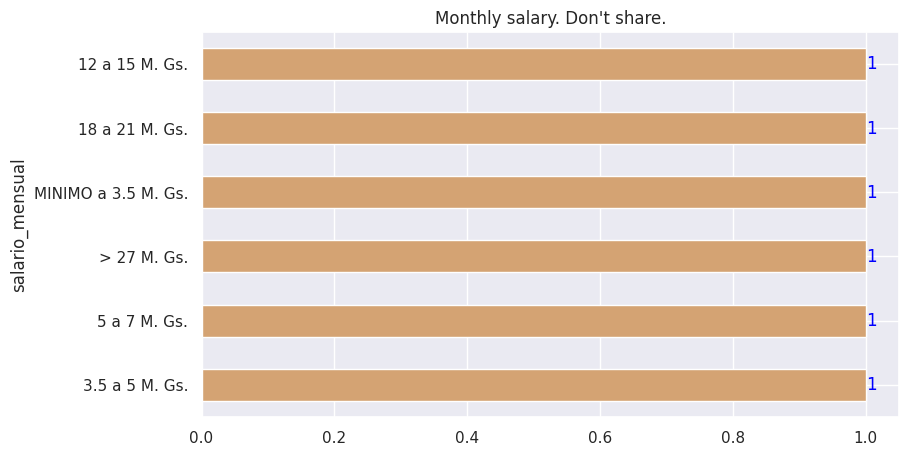

In [123]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

nc = (
    genero.get_group("NO COMPARTO")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Monthly salary. Don't share.",
        color=color_neutro_light,
    )
)


for k, v in enumerate(
    genero.get_group("NO COMPARTO")["salario_mensual"]
    .value_counts(normalize=False)
    .values
):
    nc.annotate(v, (v, k), va="center", color="blue")
plt.show()

### GENERO HOMBRES VS MUJERES

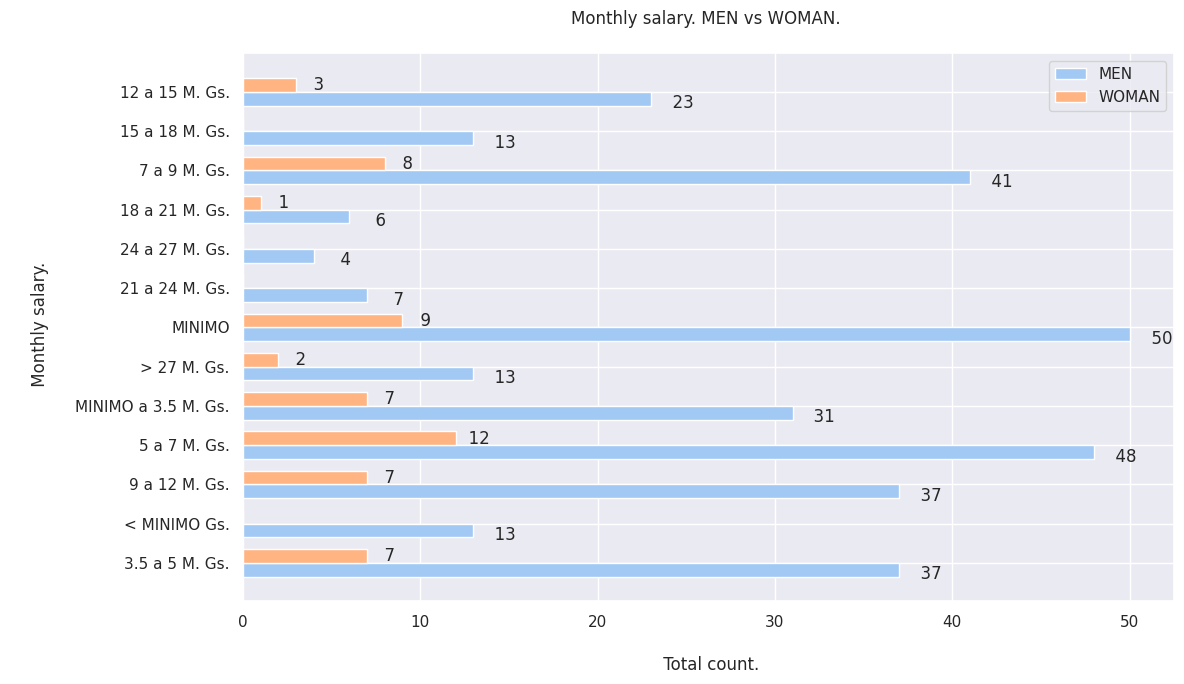

In [124]:
group_config = {
    "title": "Monthly salary. MEN vs WOMAN. \n",
    "c1_label": "MEN",
    "c2_label": "WOMAN",
    "xlabel": "\n Monthly salary.\n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    genero.get_group("HOMBRE").fillna(""),
    genero.get_group("MUJER").fillna(""),
    "salario_mensual",
    eh.get_column_uniques(df, "salario_mensual"),
    group_config,
)

### SALARIO  SEGUN experiencia_en_ti 

In [125]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [126]:
exp = df.groupby("exp_en_IT")

In [127]:
exp_keys = exp.groups.keys()

In [128]:
eh.make_df(df, "exp_en_IT", "category", "count")

,category,count
0,10-14,82
1,30-34,4
2,25-29,5
3,15-19,20
4,>50,1
5,20-24,9
6,35-39,2
7,5-9,124
8,<5,94
9,45-49,1


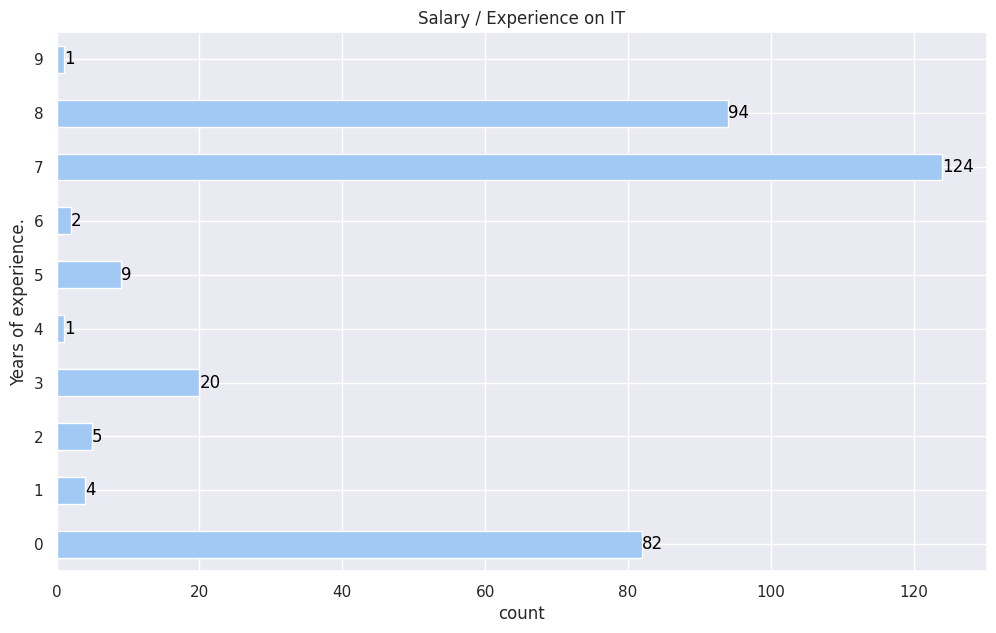

In [129]:
exp_it_df = eh.make_df(df, "exp_en_IT", "category", "count")
c = [i for i in exp_it_df["count"]]

exp_it_plot = exp_it_df.plot(
    kind="barh",
    title="Salary / Experience on IT",
    ylabel="Years of experience.",
    xlabel="count",
    legend=False,
)


for k, v in enumerate(c):
    exp_it_plot.annotate(v, (v, k), va="center", color="black")

In [130]:
for i in exp_keys:
    print("Years of experience: ", i)
    g = exp.get_group(i)
    print(eh.make_df(g, "salario_mensual", "category", "count"))
    print("\n" * 4)

Years of experience:  10-14
               category  count
0        3.5 a 5 M. Gs.      6
1         9 a 12 M. Gs.     18
2          5 a 7 M. Gs.      9
3   MINIMO a 3.5 M. Gs.      1
4           > 27 M. Gs.      7
5        21 a 24 M. Gs.      3
6        24 a 27 M. Gs.      1
7        18 a 21 M. Gs.      4
8          7 a 9 M. Gs.     12
9        15 a 18 M. Gs.      6
10       12 a 15 M. Gs.     15





Years of experience:  15-19


/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)
/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)
/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

              category  count
0       3.5 a 5 M. Gs.      1
1        9 a 12 M. Gs.      3
2         5 a 7 M. Gs.      3
3  MINIMO a 3.5 M. Gs.      1
4          > 27 M. Gs.      1
5         7 a 9 M. Gs.      5
6       15 a 18 M. Gs.      2
7       12 a 15 M. Gs.      4





Years of experience:  20-24
         category  count
0  3.5 a 5 M. Gs.      2
1  12 a 15 M. Gs.      1
2    5 a 7 M. Gs.      1
3     > 27 M. Gs.      1
4  21 a 24 M. Gs.      1
5    7 a 9 M. Gs.      1
6  15 a 18 M. Gs.      2





Years of experience:  25-29
         category  count
0     > 27 M. Gs.      1
1  21 a 24 M. Gs.      2
2    5 a 7 M. Gs.      1
3   9 a 12 M. Gs.      1





Years of experience:  30-34
        category  count
0   < MINIMO Gs.      1
1    > 27 M. Gs.      1
2  9 a 12 M. Gs.      1
3   5 a 7 M. Gs.      1





Years of experience:  35-39
         category  count
0  21 a 24 M. Gs.      1
1  12 a 15 M. Gs.      1





Years of experience:  45-49
      category  count
0  > 27 M. Gs.      1



/home/torrezmn/Documentos/GRAL_ENV/lib/python3.8/site-packages/milanesas/eda_helper.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)



### SALARIO X educación



In [131]:
ed_uniques = eh.get_column_uniques(df, "educacion")

In [132]:
for i in ed_uniques:
    print("Educacion vs. Salario : ", i)
    print("==================================")
    print(df[df["educacion"] == i]["salario_mensual"].value_counts())
    print("\n" * 5)

Educacion vs. Salario :  Master
salario_mensual
12 a 15 M. Gs.         4
5 a 7 M. Gs.           3
> 27 M. Gs.            2
15 a 18 M. Gs.         2
MINIMO a 3.5 M. Gs.    2
3.5 a 5 M. Gs.         1
7 a 9 M. Gs.           1
9 a 12 M. Gs.          1
< MINIMO Gs.           1
Name: count, dtype: int64






Educacion vs. Salario :  Ed. Basica
Series([], Name: count, dtype: int64)






Educacion vs. Salario :  Ed. Universitaria
salario_mensual
7 a 9 M. Gs.           32
5 a 7 M. Gs.           30
9 a 12 M. Gs.          25
3.5 a 5 M. Gs.         14
MINIMO a 3.5 M. Gs.    13
12 a 15 M. Gs.         13
MINIMO                  4
21 a 24 M. Gs.          4
15 a 18 M. Gs.          4
> 27 M. Gs.             4
18 a 21 M. Gs.          3
< MINIMO Gs.            3
24 a 27 M. Gs.          2
Name: count, dtype: int64






Educacion vs. Salario :  Autodidacta
salario_mensual
MINIMO a 3.5 M. Gs.    2
Name: count, dtype: int64






Educacion vs. Salario :  Doctorado
salario_mensual
24 a 27 M. Gs.    1
Name:

In [133]:
ed_groups = df.groupby("educacion")

### carreras_o_especialidades


In [134]:
esp = eh.get_column_uniques(df, "carr_especialidades")

<Axes: title={'center': 'Careers or specialties.'}, xlabel='Total', ylabel='Career/Specialtie'>

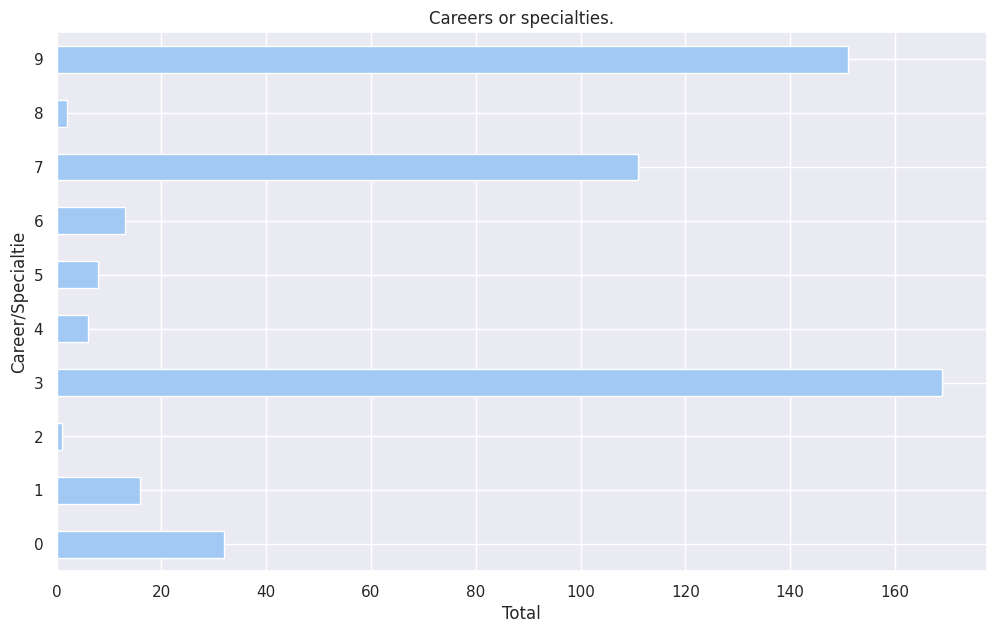

In [135]:
eh.make_df(df, "carr_especialidades", "category", "count").plot(
    kind="barh",
    title="Careers or specialties.",
    ylabel="Career/Specialtie",
    xlabel="Total",
    legend=False,
)

In [136]:
for i in esp:
    esp_df = df[df["carr_especialidades"].str.contains(i)]
    print("Especialidad : {0} / Total : {1}".format(i, esp_df.shape[0]))
    print("=" * 40)
    print(esp_df["salario_mensual"].value_counts())
    print("\n" * 4)

Especialidad : Otras / Total : 32
salario_mensual
9 a 12 M. Gs.          7
5 a 7 M. Gs.           6
3.5 a 5 M. Gs.         4
7 a 9 M. Gs.           4
MINIMO a 3.5 M. Gs.    3
21 a 24 M. Gs.         2
> 27 M. Gs.            2
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
< MINIMO Gs.           1
MINIMO                 1
Name: count, dtype: int64





Especialidad : Ninguna / Total : 16
salario_mensual
MINIMO a 3.5 M. Gs.    3
> 27 M. Gs.            2
9 a 12 M. Gs.          2
< MINIMO Gs.           2
3.5 a 5 M. Gs.         2
7 a 9 M. Gs.           2
5 a 7 M. Gs.           2
12 a 15 M. Gs.         1
Name: count, dtype: int64





Especialidad : Otras Ing. / Total : 6
salario_mensual
5 a 7 M. Gs.      4
3.5 a 5 M. Gs.    2
Name: count, dtype: int64





Especialidad : Ing. Informática / Total : 169
salario_mensual
5 a 7 M. Gs.           27
7 a 9 M. Gs.           24
3.5 a 5 M. Gs.         22
MINIMO a 3.5 M. Gs.    19
9 a 12 M. Gs.          18
12 a 15 M. Gs.         16
> 27 M. Gs.       

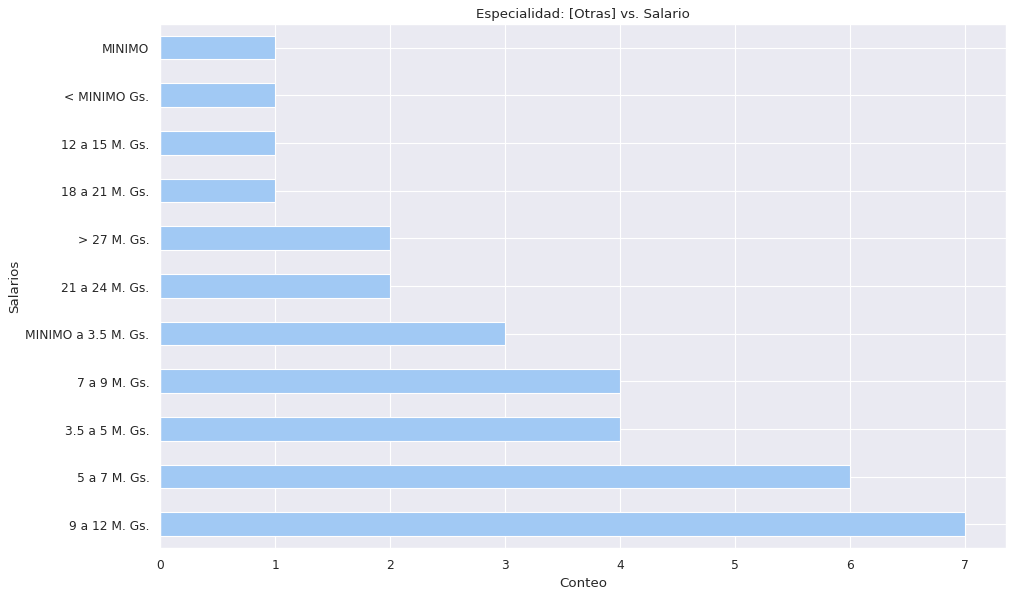

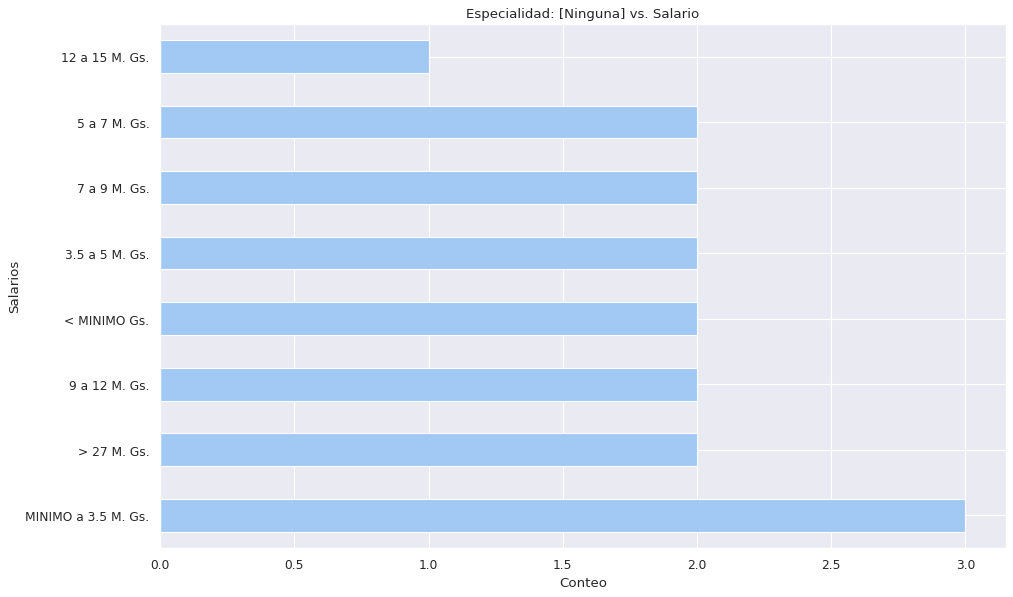

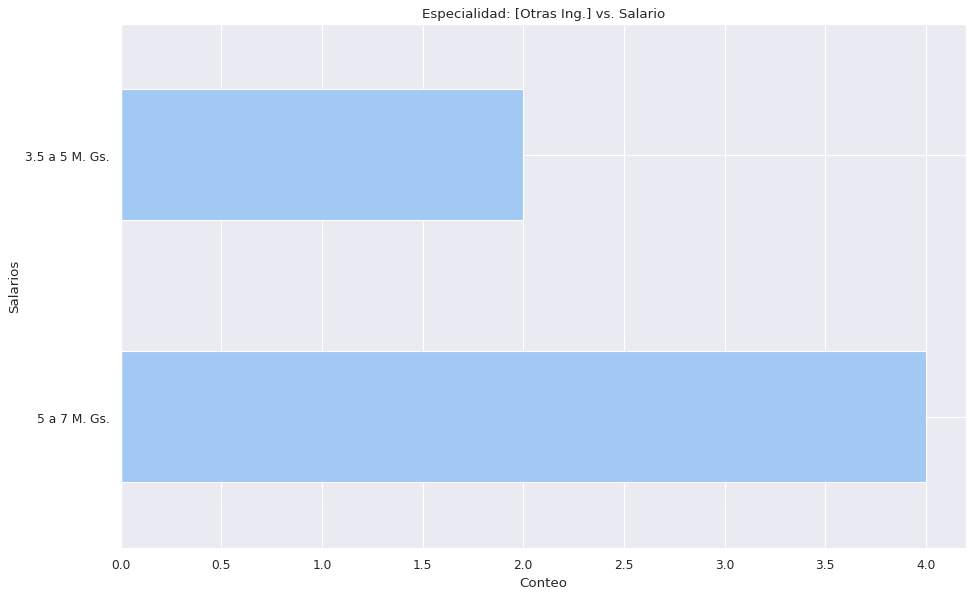

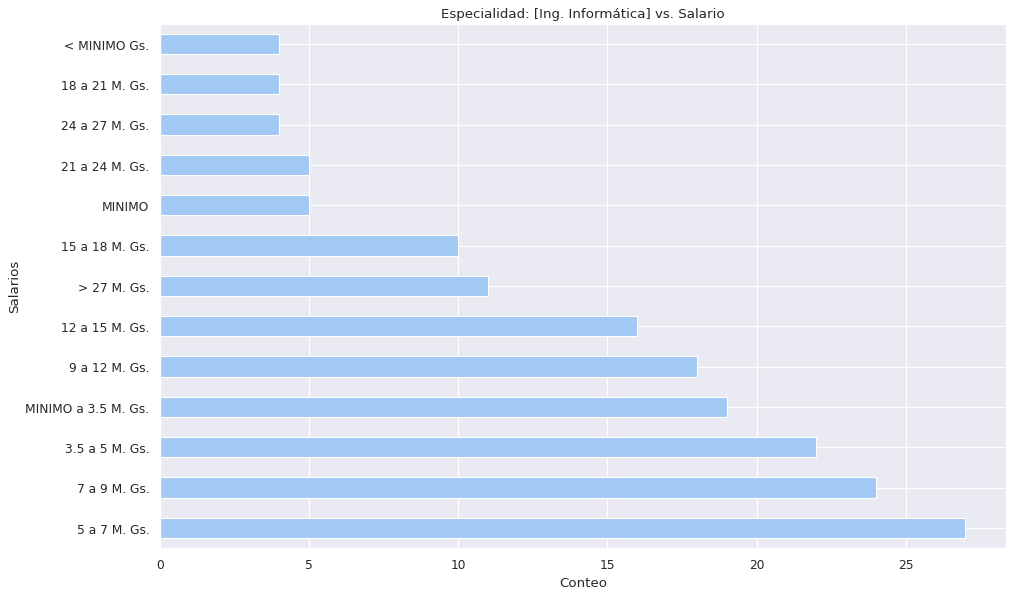

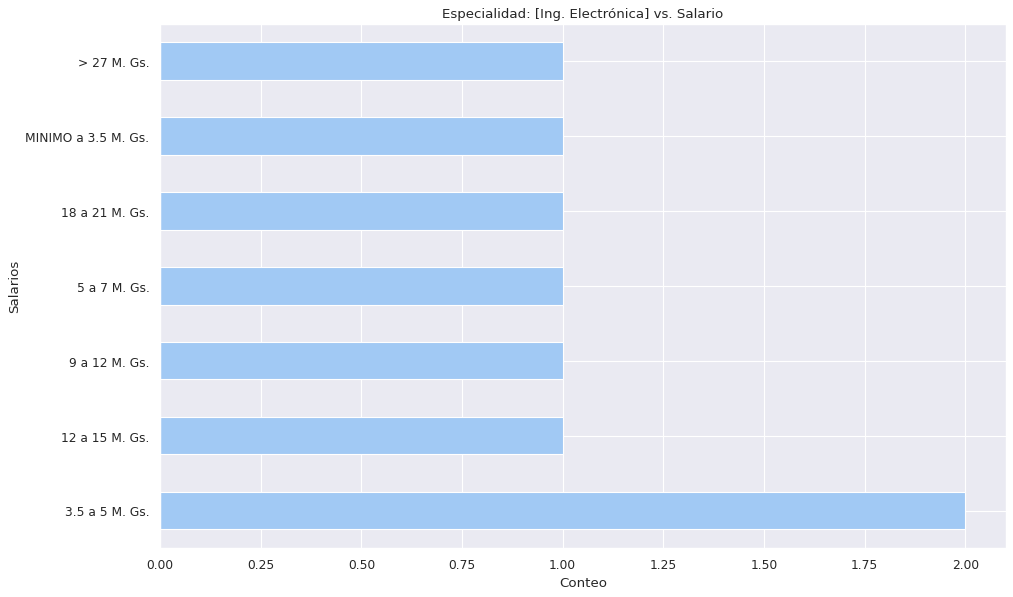

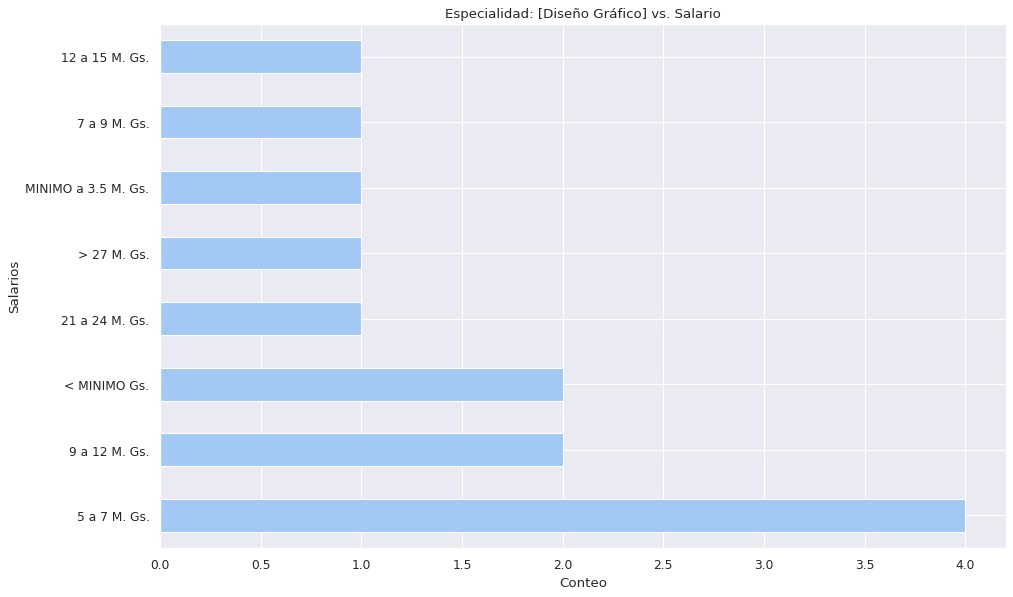

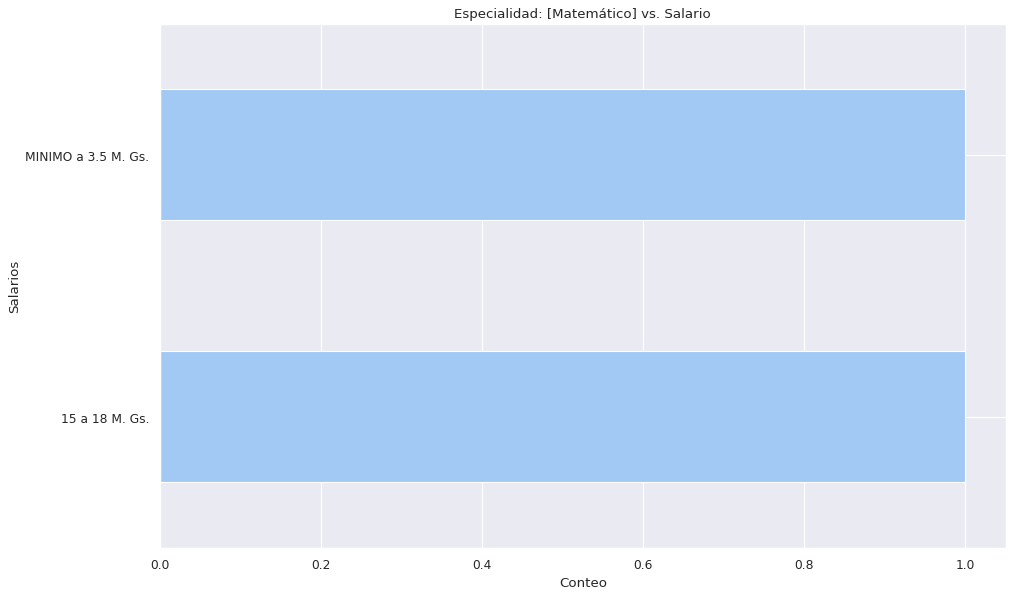

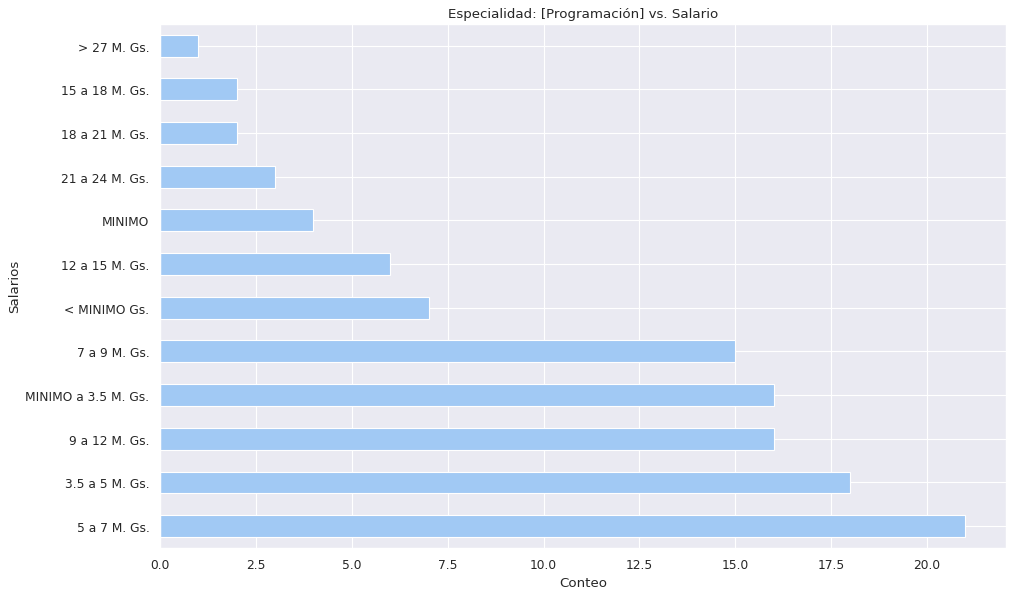

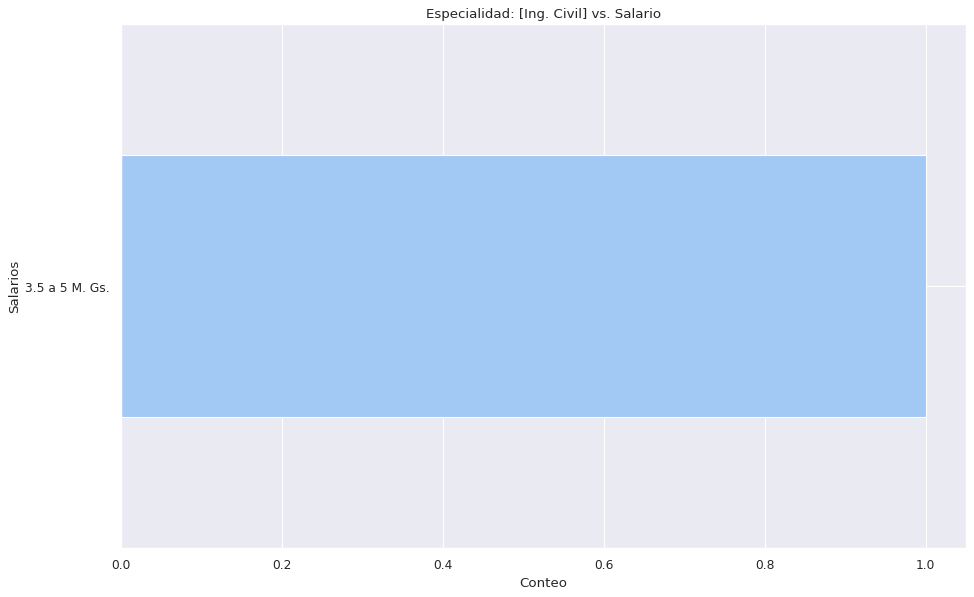

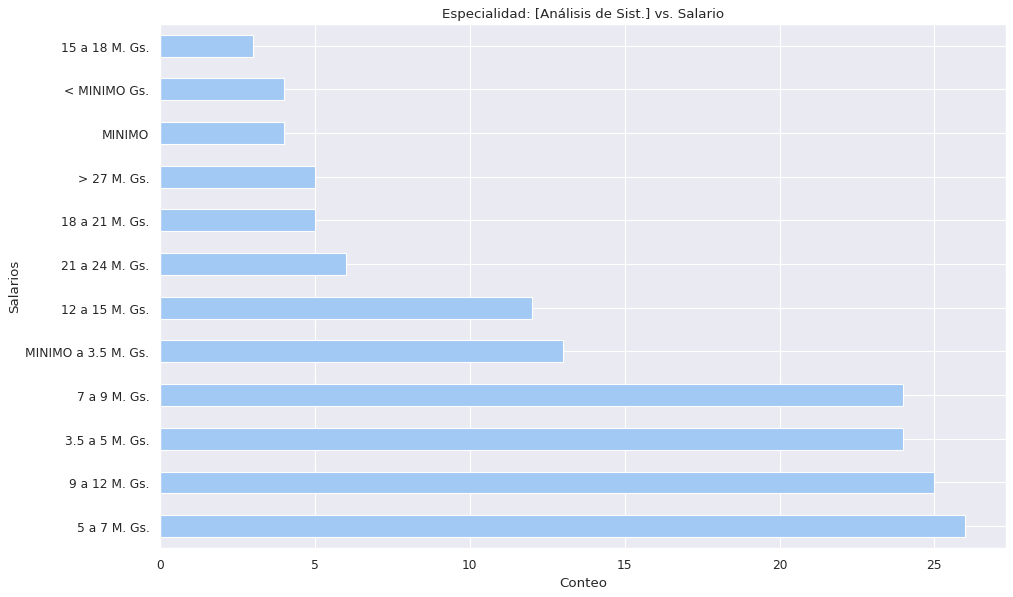

<Figure size 1200x700 with 0 Axes>

In [137]:
for k, v in enumerate(esp):
    plt.figure(figsize=(30, 80), dpi=80)
    plt.subplot(8, 2, k + 1)
    aux_df = df[df["carr_especialidades"].str.contains(v)][
        "salario_mensual"
    ].value_counts(normalize=False)
    mod = aux_df.plot(
        kind="barh",
        title="Especialidad: [{0}] vs. Salario".format(v),
        legend=False,
        ylabel="Salarios",
        xlabel="Conteo",
    )
    plt.show()


plt.subplots_adjust(left=0.6, bottom=0.1, right=1, top=0.9, wspace=0.5, hspace=0.6)

In [138]:
for k, v in enumerate(esp):
    aux_df = df[df["carr_especialidades"].str.contains(v)][
        "salario_mensual"
    ].value_counts(normalize=False)
    print("ESPECIALIDAD : ", v)
    print("=" * 20)
    print(aux_df)
    print("\n" * 3)

ESPECIALIDAD :  Otras
salario_mensual
9 a 12 M. Gs.          7
5 a 7 M. Gs.           6
3.5 a 5 M. Gs.         4
7 a 9 M. Gs.           4
MINIMO a 3.5 M. Gs.    3
21 a 24 M. Gs.         2
> 27 M. Gs.            2
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
< MINIMO Gs.           1
MINIMO                 1
Name: count, dtype: int64




ESPECIALIDAD :  Ninguna
salario_mensual
MINIMO a 3.5 M. Gs.    3
> 27 M. Gs.            2
9 a 12 M. Gs.          2
< MINIMO Gs.           2
3.5 a 5 M. Gs.         2
7 a 9 M. Gs.           2
5 a 7 M. Gs.           2
12 a 15 M. Gs.         1
Name: count, dtype: int64




ESPECIALIDAD :  Otras Ing.
salario_mensual
5 a 7 M. Gs.      4
3.5 a 5 M. Gs.    2
Name: count, dtype: int64




ESPECIALIDAD :  Ing. Informática
salario_mensual
5 a 7 M. Gs.           27
7 a 9 M. Gs.           24
3.5 a 5 M. Gs.         22
MINIMO a 3.5 M. Gs.    19
9 a 12 M. Gs.          18
12 a 15 M. Gs.         16
> 27 M. Gs.            11
15 a 18 M. Gs.         10
MINIMO           

# Especialidad vs Años de experiencia vs salario

In [139]:
punto = df.groupby(["carr_especialidades", "exp_en_IT"])

In [140]:
for k, v in enumerate(punto.groups.keys()):
    aux_df = punto.get_group(v)["salario_mensual"].value_counts()
    print("=" * 40)
    print("Especialidad. Años de experiencia. Salarios.  / {0}".format(v))
    print("=" * 40)
    print(aux_df)
    print("\n" * 4)

Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '10-14')
salario_mensual
12 a 15 M. Gs.    5
9 a 12 M. Gs.     4
7 a 9 M. Gs.      4
21 a 24 M. Gs.    2
5 a 7 M. Gs.      1
18 a 21 M. Gs.    1
15 a 18 M. Gs.    1
> 27 M. Gs.       1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '15-19')
salario_mensual
7 a 9 M. Gs.           2
9 a 12 M. Gs.          1
5 a 7 M. Gs.           1
MINIMO a 3.5 M. Gs.    1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '20-24')
salario_mensual
3.5 a 5 M. Gs.    1
12 a 15 M. Gs.    1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '35-39')
salario_mensual
12 a 15 M. Gs.    1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '5-9')
salario_mensual
5 a 7 M. Gs.           7
7 a 9 M. Gs.           7
9 a 12 M. Gs.          7
3.5 a 5 

In [141]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [142]:
eh.get_column_uniques(df, "tipo_de_trabajo")

['Dev de videojuegos',
 'Dev de sist. embebidos',
 'Project Lead',
 'Dev full-stack',
 'Dev mobile',
 'DB Admin',
 'Dev front-end',
 'QA o testing',
 'Dev back-end',
 'Aps para Esc. o Emp.']

In [143]:
tipo_trabajo_group = df.groupby(["tipo_de_trabajo", "exp_en_IT"])

In [144]:
t = eh.get_column_uniques(df, "tipo_de_trabajo")

In [145]:
for i in t:
    g = df[df["tipo_de_trabajo"].str.contains(i)].groupby("exp_en_IT")
    for j in g.groups.keys():
        p = g.get_group(j)["salario_mensual"].value_counts()
        print("grupo -> ", i)
        print("años -> ", j)
        print("----------------------> \n", p)
        print("\n" * 2)

grupo ->  Dev de videojuegos
años ->  10-14
----------------------> 
 salario_mensual
12 a 15 M. Gs.    1
18 a 21 M. Gs.    1
Name: count, dtype: int64



grupo ->  Dev de videojuegos
años ->  5-9
----------------------> 
 salario_mensual
24 a 27 M. Gs.    1
Name: count, dtype: int64



grupo ->  Dev de videojuegos
años ->  <5
----------------------> 
 salario_mensual
< MINIMO Gs.    1
Name: count, dtype: int64



grupo ->  Dev de sist. embebidos
años ->  10-14
----------------------> 
 salario_mensual
5 a 7 M. Gs.      2
9 a 12 M. Gs.     1
18 a 21 M. Gs.    1
7 a 9 M. Gs.      1
Name: count, dtype: int64



grupo ->  Dev de sist. embebidos
años ->  15-19
----------------------> 
 salario_mensual
7 a 9 M. Gs.      1
12 a 15 M. Gs.    1
Name: count, dtype: int64



grupo ->  Dev de sist. embebidos
años ->  20-24
----------------------> 
 salario_mensual
3.5 a 5 M. Gs.    1
21 a 24 M. Gs.    1
Name: count, dtype: int64



grupo ->  Dev de sist. embebidos
años ->  25-29
-----------------

In [146]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [147]:
eh.get_column_uniques(df, "modalidad")

['Hibrído', 'Remoto', 'Ninguna', 'Presencial']

In [148]:
eh.get_column_uniques(df, "trabajo")

['Internacional', 'Nacional (Paraguay)', 'Ambas']

# modalidad y trabajo som lo mismo?

In [149]:
df["modalidad_de_trabajo"] = df["modalidad"] + df["trabajo"]

<Axes: ylabel='modalidad_de_trabajo'>

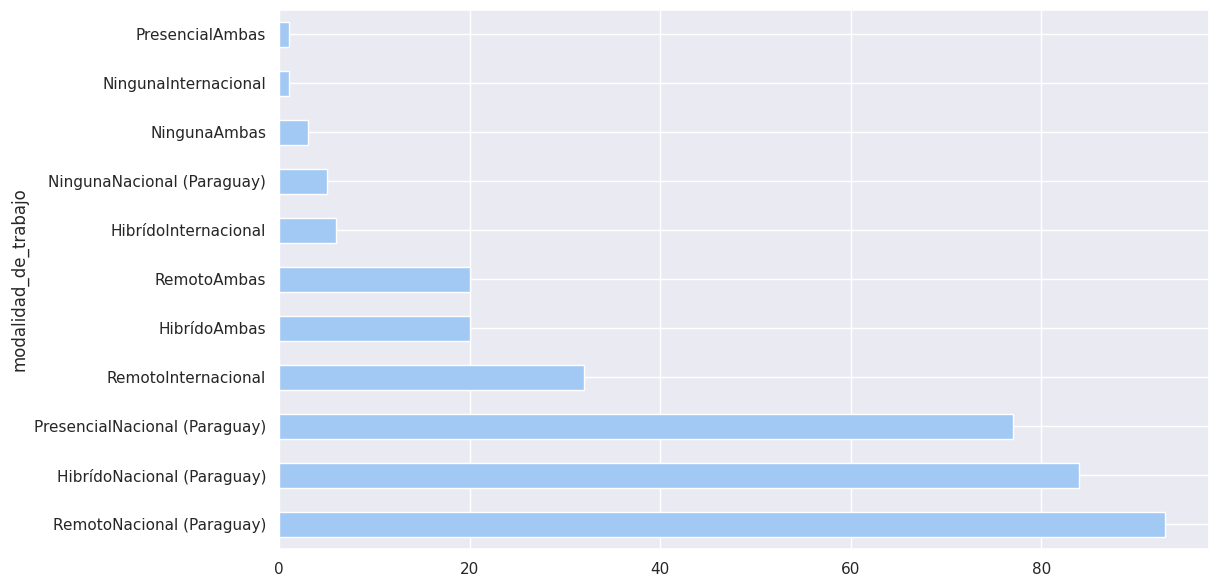

In [150]:
df["modalidad_de_trabajo"].value_counts().plot(kind="barh")

In [151]:
g_modalidad = df.groupby(["modalidad_de_trabajo", "salario_mensual"])

In [152]:
for i in g_modalidad.groups:
    print("Grupo -> ", i)
    print("=" * 34)
    d = g_modalidad.get_group(i)["tipo_de_trabajo"].value_counts(normalize=False)
    print(d)
    print("\n" * 4)

Grupo ->  ('HibrídoAmbas', '12 a 15 M. Gs.')
tipo_de_trabajo
Dev back-end                                                   1
Dev full-stack;Dev mobile;Aps para Esc. o Emp.;Project Lead    1
DB Admin                                                       1
Dev full-stack;Dev mobile;DB Admin                             1
Dev front-end                                                  1
Dev back-end;Project Lead                                      1
Name: count, dtype: int64





Grupo ->  ('HibrídoAmbas', '15 a 18 M. Gs.')
tipo_de_trabajo
Dev back-end;Dev front-end;Dev full-stack;QA o testing;DB Admin;Project Lead    1
Dev back-end;Dev full-stack                                                     1
Name: count, dtype: int64





Grupo ->  ('HibrídoAmbas', '18 a 21 M. Gs.')
tipo_de_trabajo
Dev full-stack                          1
Dev full-stack;DB Admin;Project Lead    1
Name: count, dtype: int64





Grupo ->  ('HibrídoAmbas', '24 a 27 M. Gs.')
tipo_de_trabajo
Project Lead    1
Name: c

In [153]:
df["framworks"] = (
    df["lib_frameworks"].fillna("") + " " + df["otras_lib_frameworks"].fillna("")
)

In [154]:
fram_uniques = eh.get_column_uniques(df, "framworks")

In [155]:
for i in fram_uniques:
    d = df[df["framworks"].str.contains(i)]
    g = d.groupby(["trabajo", "exp_en_IT"])
    for j in g.groups.keys():
        print("Framework : {0} / Salario: {1}".format(i, j))
        print("=" * 44)
        print(g.get_group(j)["salario_mensual"].value_counts())
        print("\n" * 3)

Framework : Django / Salario: ('Ambas', '10-14')
salario_mensual
12 a 15 M. Gs.    3
9 a 12 M. Gs.     1
> 27 M. Gs.       1
21 a 24 M. Gs.    1
Name: count, dtype: int64




Framework : Django / Salario: ('Ambas', '30-34')
salario_mensual
9 a 12 M. Gs.    1
Name: count, dtype: int64




Framework : Django / Salario: ('Ambas', '35-39')
salario_mensual
21 a 24 M. Gs.    1
Name: count, dtype: int64




Framework : Django / Salario: ('Ambas', '45-49')
salario_mensual
> 27 M. Gs.    1
Name: count, dtype: int64




Framework : Django / Salario: ('Ambas', '5-9')
salario_mensual
18 a 21 M. Gs.         1
MINIMO a 3.5 M. Gs.    1
12 a 15 M. Gs.         1
Name: count, dtype: int64




Framework : Django / Salario: ('Ambas', '<5')
salario_mensual
3.5 a 5 M. Gs.         3
MINIMO a 3.5 M. Gs.    1
12 a 15 M. Gs.         1
7 a 9 M. Gs.           1
Name: count, dtype: int64




Framework : Django / Salario: ('Internacional', '10-14')
salario_mensual
> 27 M. Gs.       4
18 a 21 M. Gs.    2
15 a 18 M. 